In [49]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
%store -r input

In [15]:
%store -r df

In [16]:
df

,Argument ID,Openness to change,Self-Enhancement,Conservation,Self-Transcendence,labels
0,A01002,0,0,1,0,"[0.0, 0.0, 1.0, 0.0]"
1,A01005,0,0,1,0,"[0.0, 0.0, 1.0, 0.0]"
2,A01006,0,1,1,0,"[0.0, 0.5, 0.5, 0.0]"
3,A01007,0,0,2,1,"[0.0, 0.0, 0.6666666666666666, 0.3333333333333..."
4,A01008,0,0,1,2,"[0.0, 0.0, 0.3333333333333333, 0.6666666666666..."
...,...,...,...,...,...,...
5383,E08005,0,1,2,1,"[0.0, 0.25, 0.5, 0.25]"
5384,E08008,0,1,1,1,"[0.0, 0.3333333333333333, 0.3333333333333333, ..."
5385,E08009,0,1,1,0,"[0.0, 0.5, 0.5, 0.0]"
5387,E08016,0,2,1,1,"[0.0, 0.5, 0.25, 0.25]"


In [17]:
X=np.array(input)
y=df.labels

In [29]:
len(input[0])

219

strumentopolo 1

In [50]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Define the model
model = Sequential()

# Embedding layer (not used in this example as we're working with binary vectors)
# model.add(Embedding(input_dim=max_features, output_dim=embedding_dims, input_length=maxlen))

# Convolutional layers
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(1,219)))
model.add(GlobalMaxPooling1D())

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 6 units for classification
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 1, 64)             42112     
                                                                 
 global_max_pooling1d_5 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 4)                 516       
                                                                 
Total params: 50948 (199.02 KB)
Trainable params: 50948 (199.02 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
y_train=y_train.to_numpy()
y_train=np.array(y_train.tolist())

In [36]:
y_val=y_val.to_numpy()
y_val=np.array(y_val.tolist())

In [39]:
X_train.shape

(2216, 219)

In [44]:


# Assuming X_train is your input data
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

# Now, you can use X_train_reshaped as the input to your model


In [45]:
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))


In [48]:
!pip install --upgrade tensorflow
!pip install --upgrade keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/b2/e4/30b53d839608d2212b97972a8516ba0c7e776ee1102eaa82624807b944cf/keras-3.0.1-py3-none-any.whl.metadata
  Using cached keras-3.0.1-py3-none-any.whl.metadata (4.8 kB)
Using cached keras-3.0.1-py3-none-any.whl (999 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.1 which is incompatible.


In [61]:
# Train the model and store the history for plotting
history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_val, y_val),
                    batch_size=32,
                    verbose=1)

Epoch 1/20
70/70 [==============================] - 0s 4ms/step - loss: 1.2771 - accuracy: 0.5072 - val_loss: 1.3363 - val_accuracy: 0.3971
Epoch 2/20
70/70 [==============================] - 0s 3ms/step - loss: 1.2694 - accuracy: 0.5108 - val_loss: 1.3426 - val_accuracy: 0.4025
Epoch 3/20
70/70 [==============================] - 0s 3ms/step - loss: 1.2681 - accuracy: 0.5248 - val_loss: 1.3428 - val_accuracy: 0.4152
Epoch 4/20
70/70 [==============================] - 0s 3ms/step - loss: 1.2672 - accuracy: 0.5090 - val_loss: 1.3405 - val_accuracy: 0.4242
Epoch 5/20
70/70 [==============================] - 0s 3ms/step - loss: 1.2604 - accuracy: 0.5122 - val_loss: 1.3413 - val_accuracy: 0.4061
Epoch 6/20
70/70 [==============================] - 0s 3ms/step - loss: 1.2597 - accuracy: 0.5212 - val_loss: 1.3427 - val_accuracy: 0.4079
Epoch 7/20
70/70 [==============================] - 0s 3ms/step - loss: 1.2543 - accuracy: 0.5311 - val_loss: 1.3512 - val_accuracy: 0.3736
Epoch 8/20
70/70 [==

strumentopolo 2.0 a bit more complex

In [67]:


# Define the model
model = Sequential()

# Embedding layer (not used in this example as we're working with binary vectors)
# model.add(Embedding(input_dim=max_features, output_dim=embedding_dims, input_length=maxlen))

# Convolutional layers
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(1, 219)))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(GlobalMaxPooling1D())

# Dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 6 units for classification
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 1, 64)             42112     
                                                                 
 conv1d_13 (Conv1D)          (None, 1, 128)            24704     
                                                                 
 conv1d_14 (Conv1D)          (None, 1, 256)            98560     
                                                                 
 global_max_pooling1d_7 (Gl  (None, 256)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_15 (Dense)            (None, 512)               131584    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                     

In [68]:
# Train the model and store the history for plotting
history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_val, y_val),
                    batch_size=32,
                    verbose=1)

Epoch 1/20
70/70 [==============================] - ETA: 0s - loss: 1.3834 - accuracy: 0.2847WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001BE2BED3560> and will run it as-is.
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x000001BE2BED3560>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x000001BE2BED3560>. Note that functions defined in certain environments, like the interac

In [52]:
import matplotlib.pyplot as plt

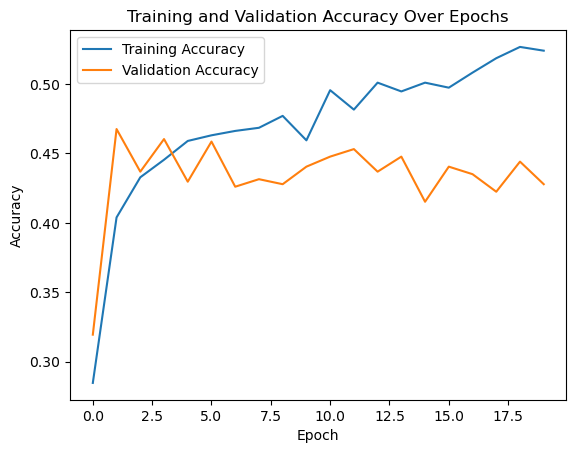

In [69]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

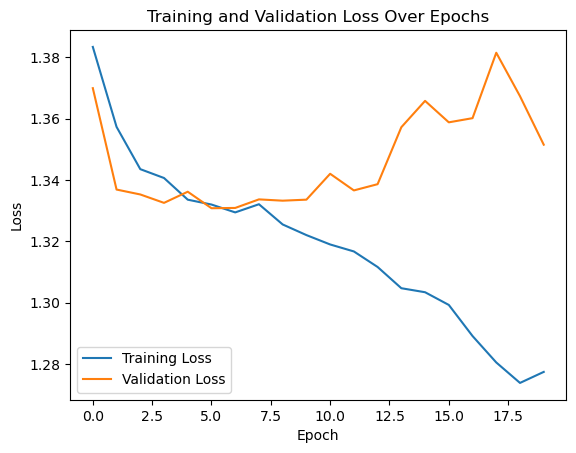

In [70]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

As for the 6 generalized labels, none of the two metrics seems to be reliable, this is probably due to the fact that the dataset needs to be balanced: some classes are much more represented than others. 
Classification attempts using the original 20 labels were even worse, with a validation accuracy score around 0.05, which would be the score of the trivial classifier.

So to-do:
- balance generalized labels
- implement again the cnn on the balanced dataset via gridsearch as well
- compare the cnn results with other classifiers such as rnn and lstm
- try different vectorization techniques such as word2vec 